# A Safety Oriented Look at Pittsburgh Neighborhoods

When moving into a neighborhood in Pittsburgh there are a few main things that you want to take into account. Cost, location, and safety. Through this notebook we take a look at the safety of neighborhoods via examining the number of speedhumps that are located within and the frequency of crime and fire incidents. All of these factors will determine which neighborhood we are least likely to bite the dust in.

## Importing Our Data

First thing we have to do is import our data into three separate variables so that we can later turn them into dictionaries and then into dataframes. We also define a function here that we'll use later to make some pretty graphs so that even numpties know where to go for the safeest experience... on second thought, maybe we shouldn't tell them where to go.

In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.font_manager

def metaGraphGroup(label):
    title = label + " Per Neighborhood in Pittsburgh, PA"
    plt.ylabel(label, fontweight="bold", fontname="PT Serif", fontsize=13)
    plt.xlabel("Neighborhood", fontweight="bold", fontname="PT Serif", fontsize=13)
    plt.title(title, fontweight="bold", fontname="PT Serif", fontsize=15)

#loads in all three datasets
fires = pd.read_csv("data/fires.csv")
chip = pd.read_csv("data/CrimeRate.csv")
humps = pd.read_csv("data/speedhumps.csv")


## An Individual Glimpse

Before we combine our metrics, we're going to take some time to look at everything that each member has created so far and see what we can learn from that, then we'll see what information we can learn when combining everything together.

### Crime In Pittsburgh

First, we're going to take a look at the crime metric.

<AxesSubplot:title={'center':'Count of Crimes Per Neighborhood'}>

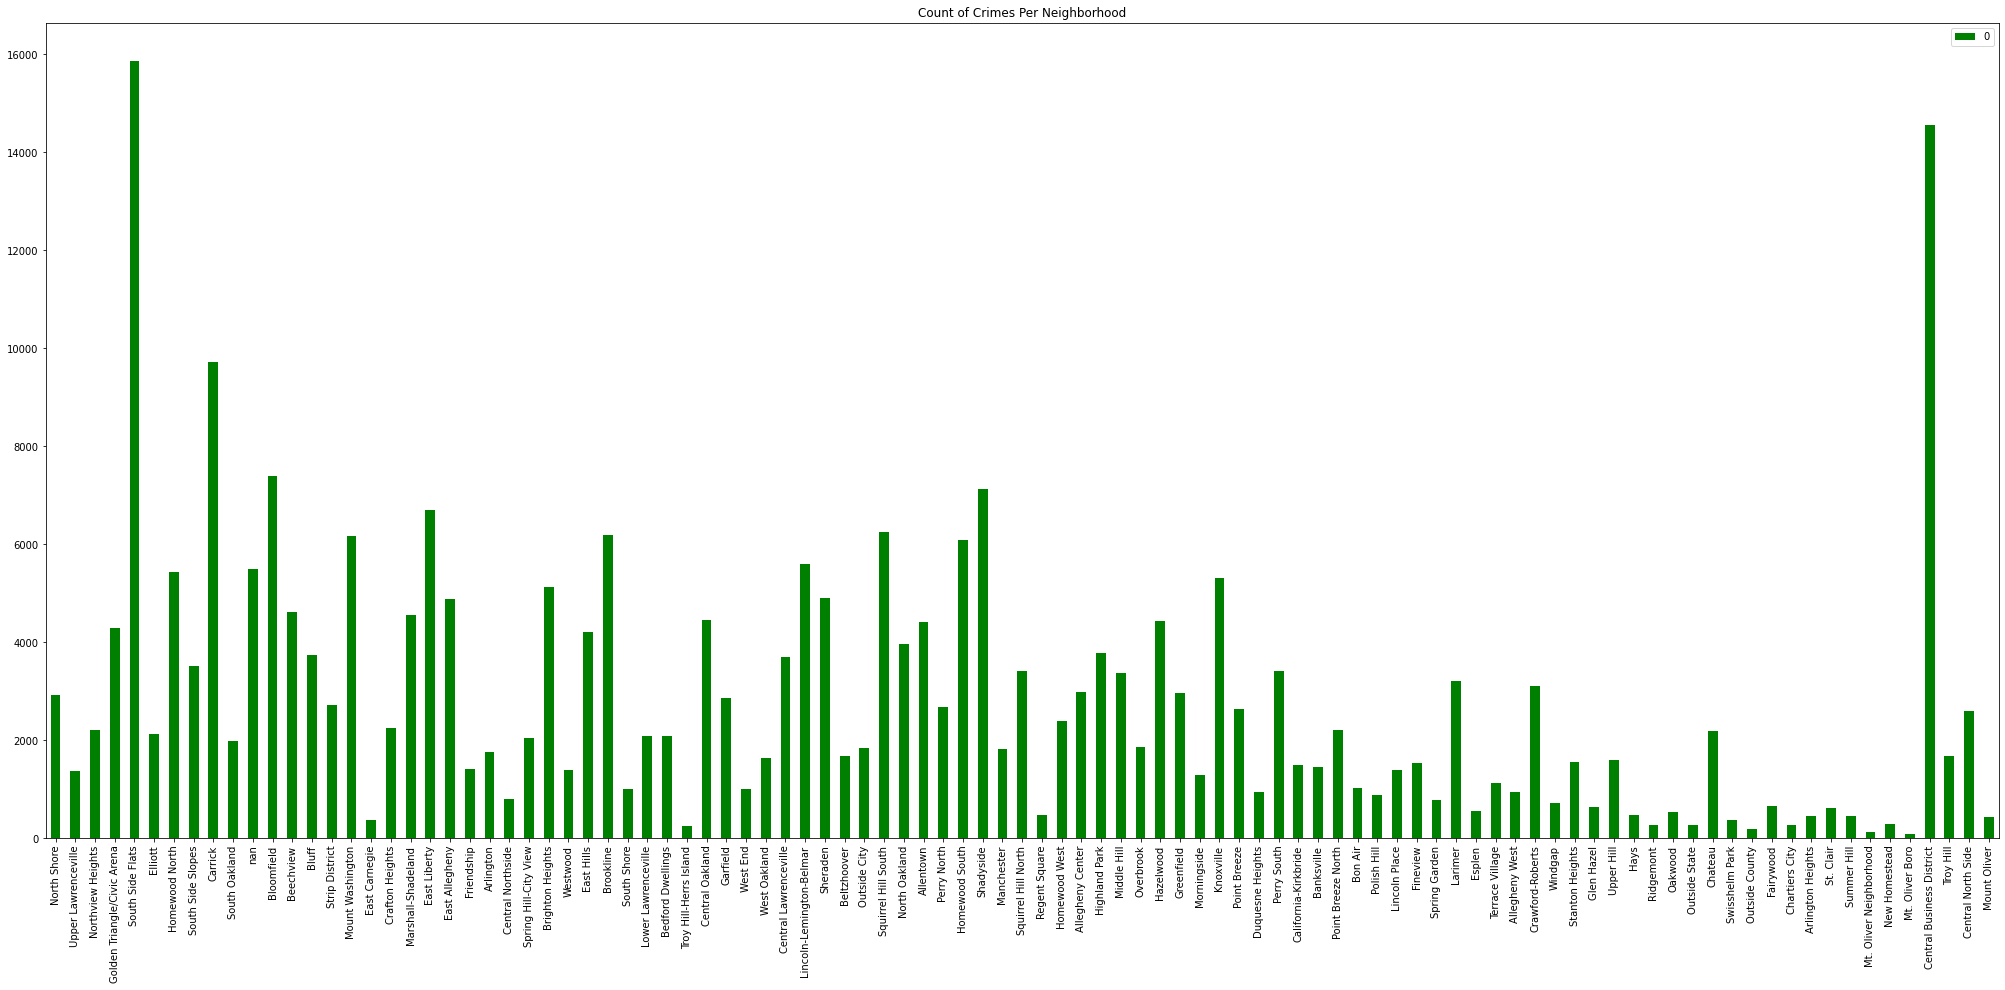

In [2]:
import pandas as pd
%matplotlib inline

chip = pd.read_csv("data/CrimeRate.csv")

dict = {}
dict_count = {}
for index, row in chip.iterrows():
    if not row['INCIDENTNEIGHBORHOOD'] in dict:
        dict[row['INCIDENTNEIGHBORHOOD']] = row['HIERARCHY']
        dict_count[row['INCIDENTNEIGHBORHOOD']] = 1
    else:
        dict[row['INCIDENTNEIGHBORHOOD']] = dict.get(row['INCIDENTNEIGHBORHOOD']) + row['HIERARCHY']
        dict_count[row['INCIDENTNEIGHBORHOOD']] = dict_count.get(row['INCIDENTNEIGHBORHOOD']) + 1
        
mean = {}
for (k,v), (k2,v2) in zip(dict.items(), dict_count.items()):
     mean[k] = v/v2

count_df = pd.DataFrame.from_dict(dict_count, orient = 'index')
mean_dataframe = pd.DataFrame.from_dict(mean, orient = 'index')

count_df.plot(kind = "bar", figsize=(35,15), color= "green", title = "Count of Crimes Per Neighborhood")


<AxesSubplot:title={'center':'Average of Hierarchical Crime Per Neighborhood'}>

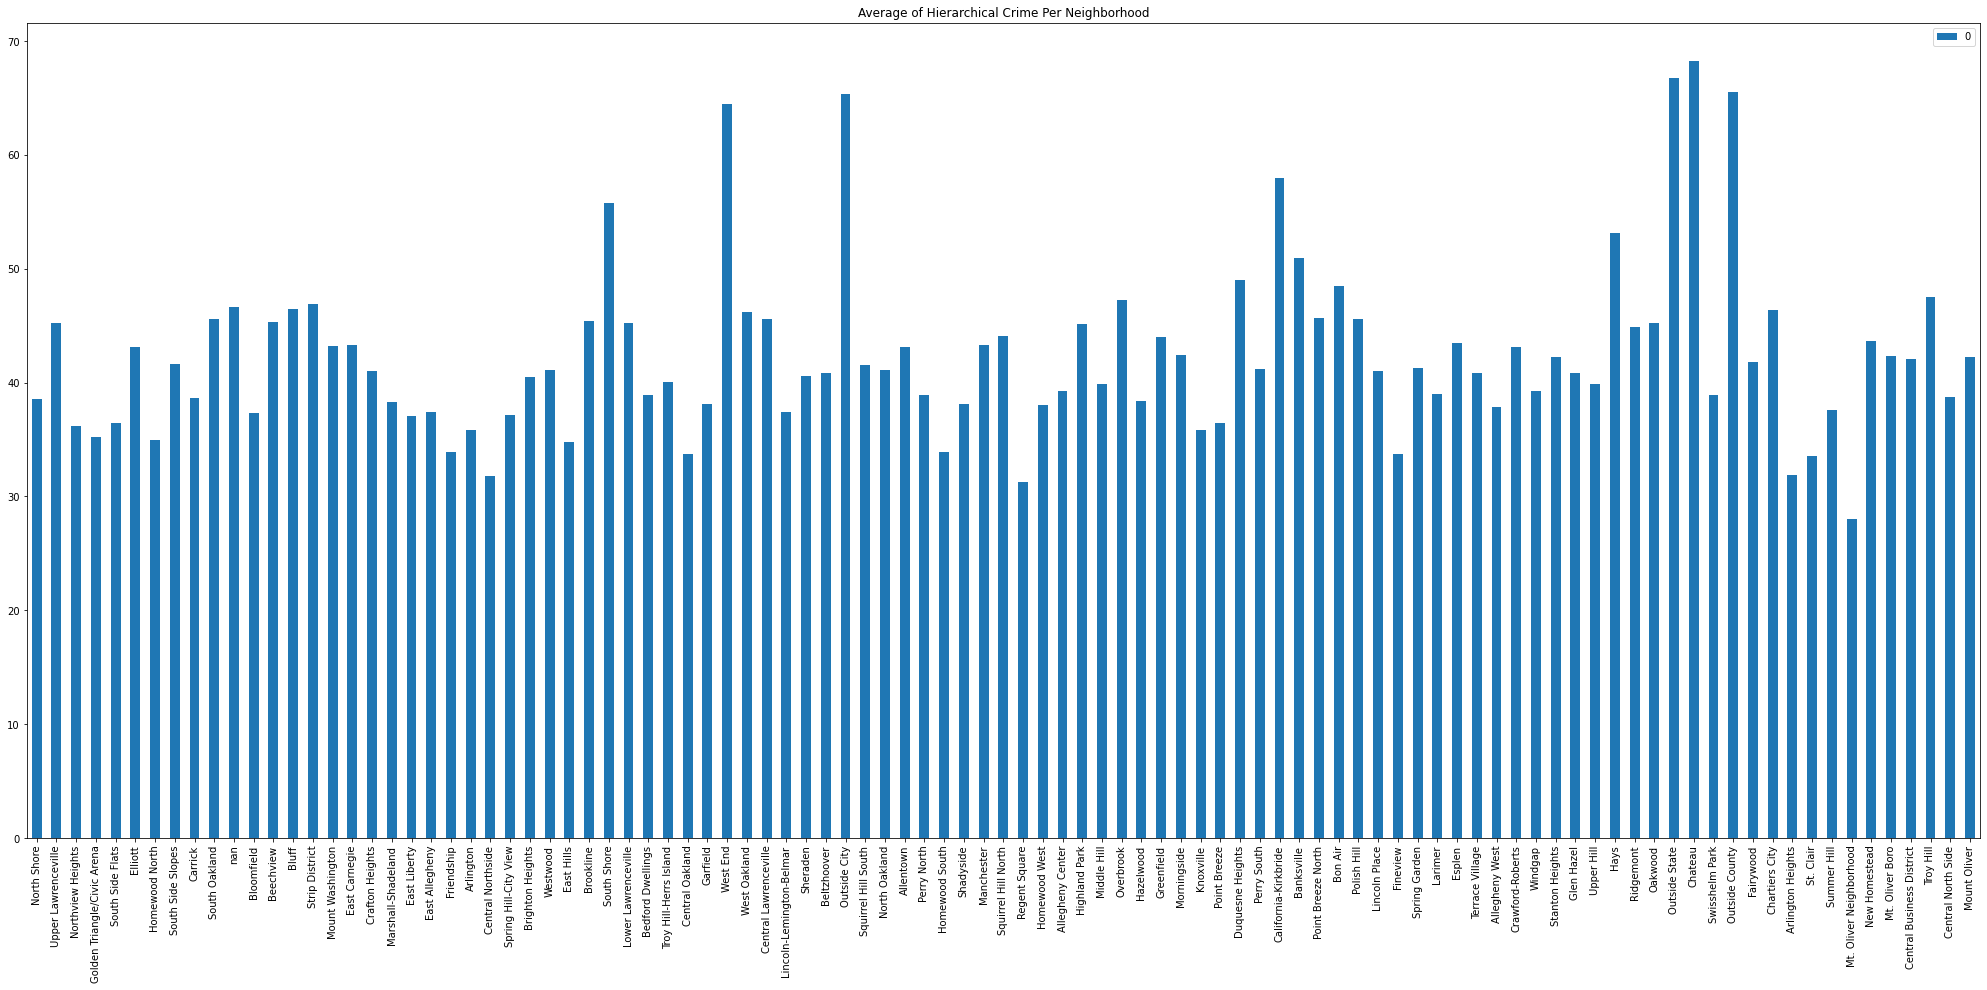

In [3]:
mean_dataframe.plot(kind = "bar", figsize=(35,15), title = "Average of Hierarchical Crime Per Neighborhood")

<AxesSubplot:title={'center':'Sorted Average of Hierarchical Crime Per Neighborhood'}>

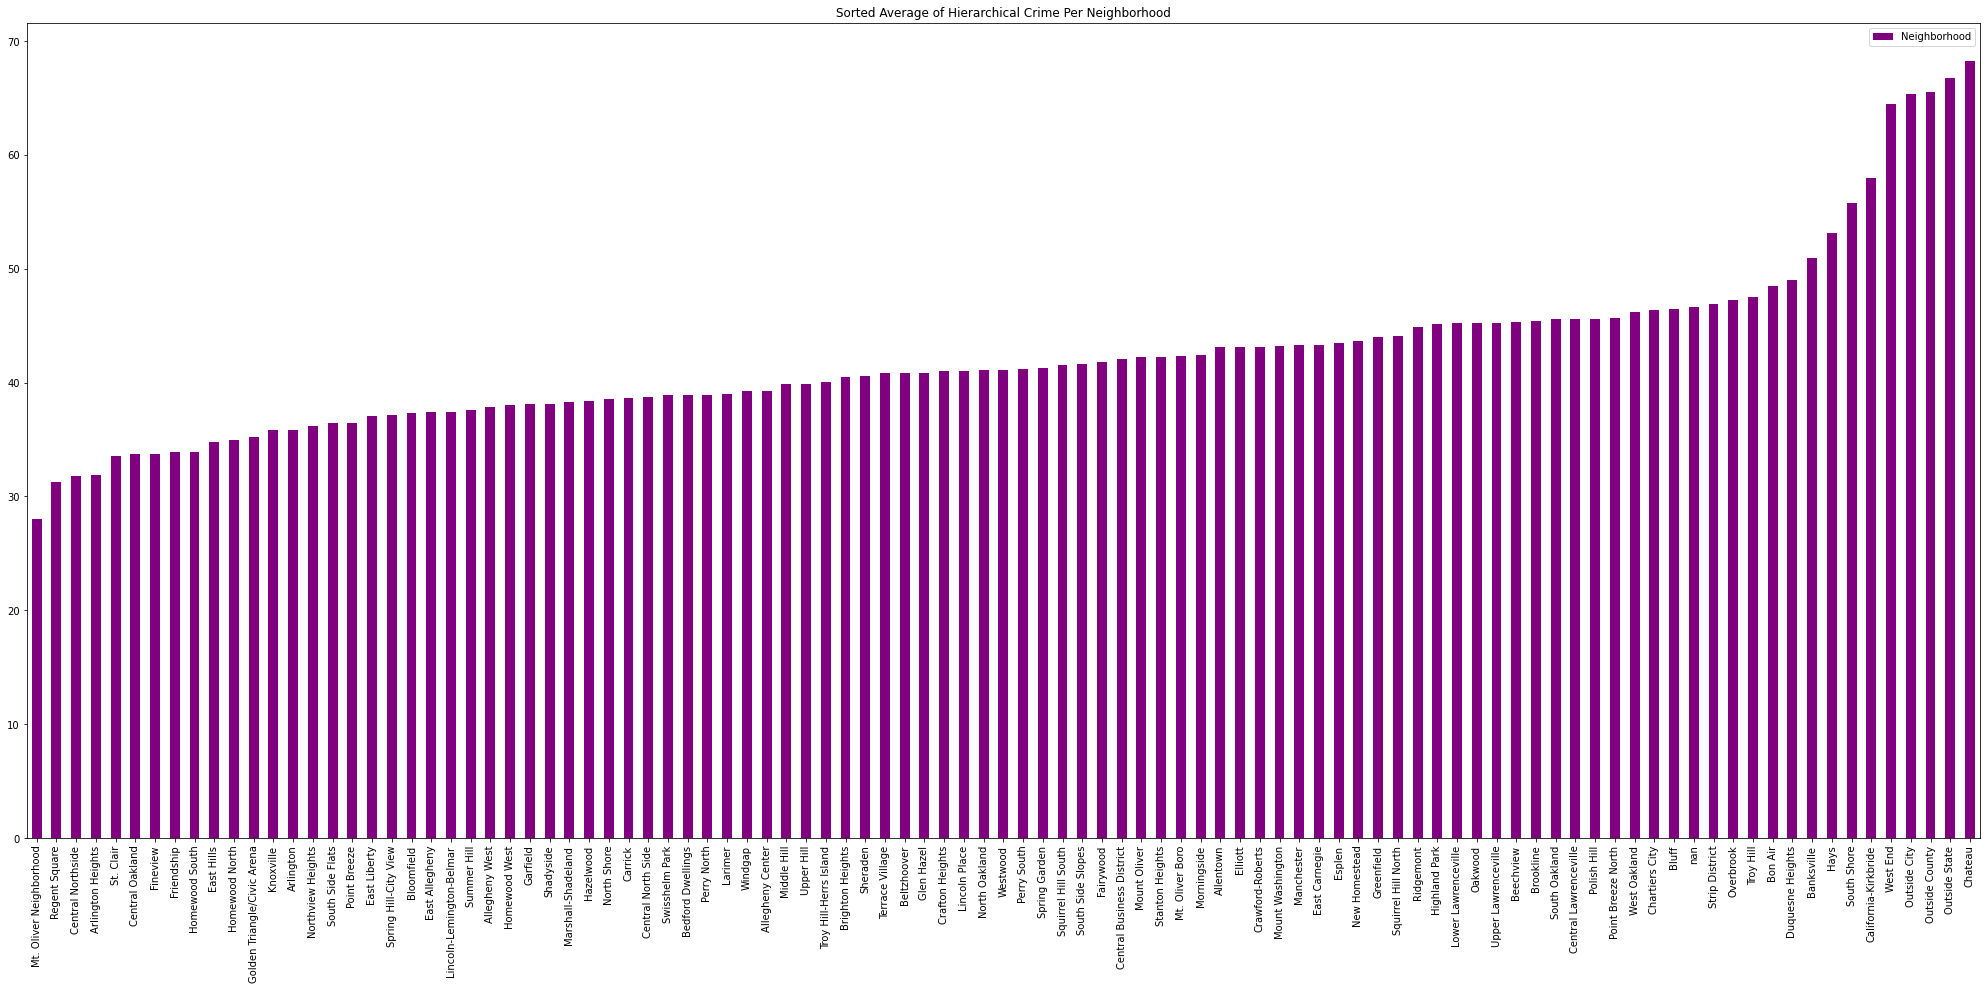

In [4]:
mean_dataframe.columns = ['Neighborhood']
sorted_mean = mean_dataframe.sort_values('Neighborhood', axis = 0, ascending = True, kind = "quicksort")
sorted_mean.plot(kind = "bar", figsize=(35,15), title = "Sorted Average of Hierarchical Crime Per Neighborhood", color = "purple")

#### Conclusion
After sorting my plot of average hierachical crime, it was a lot clearer to differentiate between the worst and best neighborhoods. As a result, I conclude that this dataset shows that Mt. Oliver is the best neighborhood because it has the smallest average of hierarchical crime and a low amount of overall crimes commited. This means that families and residents are in far less danger than those in other neighborhoods, which makes it safer than other neighborhoods in the city.

### Fires in Pittsburgh

Now, we'll take a look at fire incidents across the different neighborhoods.

<AxesSubplot:title={'center':'Fire Incidents Per Neighborhood in Pittsburgh'}>

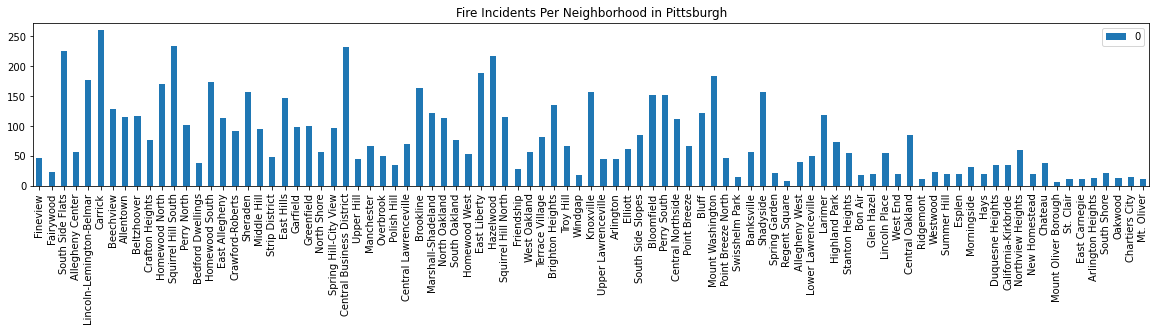

In [5]:
import pandas as pd

#Sets up dataframe from the file and creates an empty dictionary
fires = pd.read_csv("data/fires.csv")
fire_count = {}

#Cycles through the data set and counts the number of fire incidents in each neighborhood. 
#This information is then added to the dictionary
for index, row in fires.iterrows():
    neighborhood = row['neighborhood']
    if neighborhood in fire_count:
        fire_count[neighborhood] += 1
    elif neighborhood not in fire_count and neighborhood != None:
        fire_count[neighborhood] = 1

#turns the dictionary into a dataframe and creates a basic bar graph
graph = pd.DataFrame.from_dict(fire_count, orient='index', dtype = None, columns=None)
graph = graph.iloc[1: , :]
graph.plot.bar(figsize=(20,3), title = "Fire Incidents Per Neighborhood in Pittsburgh")

<AxesSubplot:title={'center':'Fire Incidents Per Neighborhood in Pittsburgh'}>

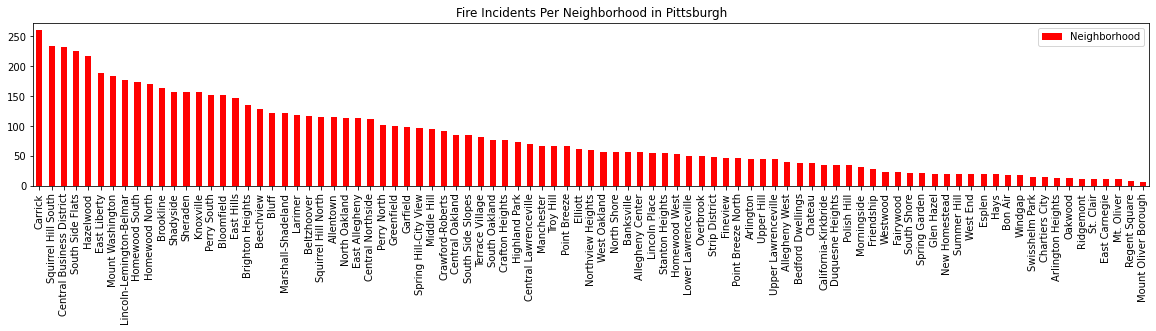

In [6]:
#here we sort the values of the dataframe and regraph
graph.columns = ['Neighborhood']
firesSorted = graph.sort_values('Neighborhood', axis = 0, ascending=False, kind = "quicksort")
firesSorted.plot.bar(figsize=(20,3), title = "Fire Incidents Per Neighborhood in Pittsburgh", color = "red")

#### Conclusion:
From the sorted data, it is much easier to see which neighborhoods are the best. From our preliminary findings, we can see that by my metric, the best neighborhood in Pittsburgh is Mount Oliver Borough, although not by much. While there are many neighborhoods with a similar number of fire incidents, Mount Oliver Borough does have the least. Since they have the least amount of fire incidents, they are the best neighborhood in Pittsburgh. While my metric declared Mount Oliver Borough as the best neighborhood, my experience states otherwise. My personal favorite neighborhood is Moneroeville due to it having lots to do and is generally a nice area. I believe this discrepency between my favorite neighborhood and the one the data declared the best is due to what determines my favorite neighborhood. Other than Oakland, I have never lived in Pittsburgh, so I never took the fire safety into consideration as I would only be there for a limited time.

### Speedhumps in Pittsburgh

Finally, we're going to take a look at the number of speedhumps throughout Pittsburgh. 

In [7]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.font_manager

def metaGraph():
    plt.yticks([0,2,4,6,8,10,12,14,16,18,])
    plt.ylabel("Humps", fontweight="bold", fontname="PT Serif", fontsize=13)
    plt.xlabel("Neighborhood", fontweight="bold", fontname="PT Serif", fontsize=13)
    plt.title("Humps per Hood in Pittsburgh, PA", fontweight="bold", fontname="PT Serif", fontsize=15)

matplotlib.font_manager.findSystemFonts(fontpaths="/data/fonts/", fontext='ttf')

humps = pd.read_csv("data/speedhumps.csv")

humps.head()

,id,hump_id,locator_address_number,locator_street,pavement,speed_hump_material,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,430808404,1,4337.0,Saline St,9257,Asphalt,Squirrel Hill South,5,14,42003141400,3,14,4,2-15,40.419835,-79.926062
1,1520886592,2,NaN,Summerset Dr,15346,NaN,Squirrel Hill South,5,14,42003141400,3,14,4,2-20,40.425040,-79.912040
2,858537521,3,511.0,Gold Way,1755,Asphalt,North Oakland,6,5,42003562000,3,5,4,2-23,40.456746,-79.954521
3,297775878,4,547.0,Gold Way,1755,Asphalt,North Oakland,6,5,42003562000,3,5,4,2-23,40.457333,-79.954899
4,1061197751,5,593.0,Gold Way,1755,Asphalt,North Oakland,6,5,42003562000,3,5,4,2-23,40.458061,-79.955355


In [8]:
hph = {}  # My custom metric of Humps Per Hood
hoods = []
nums = []

# To do this better, insert in order the neighborhoods, then increment the corresponding index in the nums list
# FUN FACT: YOU CAN'T ACTUALLY DO THAT (AT LEAST NOT EASILY)
for index, row in humps.iterrows():
    hood = row["neighborhood"]
    if hood in hph:
        hph[hood] += 1
    else:
        hph[hood] = 1
        
for i in hph:
    hoods.append(i)
    nums.append(hph[i])


hph = {"Neighborhood":hoods, "Humps":nums}
print(hph)

{'Neighborhood': ['Squirrel Hill South', 'North Oakland', 'Brookline', 'Bloomfield', 'Polish Hill', 'Homewood South', 'Mount Washington', 'South Side Flats', 'Central Oakland', 'Squirrel Hill North', 'Upper Hill', 'Highland Park', 'Carrick', 'Perry North', 'South Side Slopes', 'Garfield', 'Stanton Heights', 'Overbrook'], 'Humps': [18, 6, 4, 3, 6, 4, 3, 3, 1, 3, 4, 2, 9, 4, 4, 3, 1, 1]}


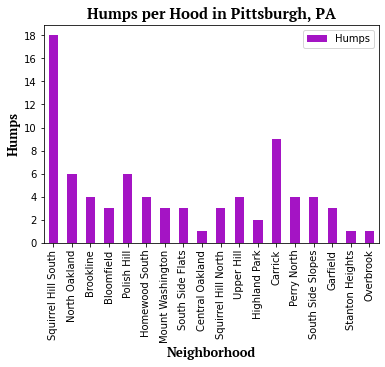

In [9]:
graphHumps = pd.DataFrame.from_dict(hph)

graphHumps.plot.bar(color="#A414C4", x="Neighborhood", y="Humps")
metaGraph()

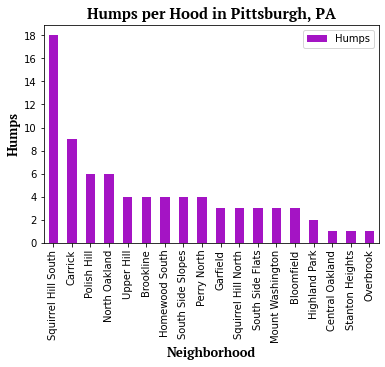

In [10]:
graphHumpsSorted = graphHumps.sort_values("Humps", ascending=False)

graphHumpsSorted.plot.bar(color="#A414C4", x="Neighborhood", y="Humps")
metaGraph()

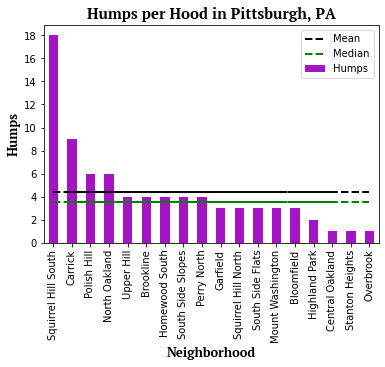

In [11]:
mean = graphHumps["Humps"].mean()
median = graphHumps["Humps"].median()
graphHumps["Mean"] = mean
graphHumps["Median"] = median
graphHumpsSorted = graphHumps.sort_values("Humps", ascending=False)

graphHumpsSorted.plot.bar(color="#A414C4", x="Neighborhood", y="Humps")
graphHumpsSorted["Mean"].plot.line(style="--", lw=2, color="black")
graphHumpsSorted["Median"].plot.line(style="--", rot=90, lw=2, color="green")
plt.legend(["Mean", "Median", "Humps"])
metaGraph()

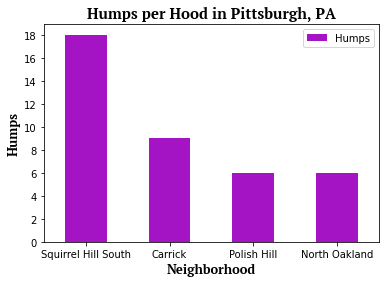

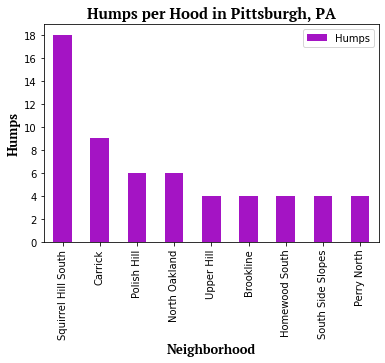

In [12]:
ghwQueryMean = graphHumpsSorted["Humps"] >= mean
ghwQueryMedian = graphHumpsSorted["Humps"] >= median

graphHumpsSorted[ghwQueryMean].plot.bar(color="#A414C4",x="Neighborhood", y="Humps", rot=0)
metaGraph()
graphHumpsSorted[ghwQueryMedian].plot.bar(color="#A414C4",x="Neighborhood", y="Humps")
metaGraph()

#### Declaring Our Winners

The last thing that remains for us to do is crown some winners. Sadly, there are a bunch of ties in our data, so the best we can do is give a clear first and second (Going to Squirrel Hill South and Carrick respectively), then give out a bunch of tied 3rd and 4th place medals. To do this we collect the neighborhoods that are above the mean line and those that are above the median. This gets us some slightly different results, and it's up to you on which average to trust, but now you have a good idea of where to start on picking your safest neighborhood.

## Data to Dictionary

Now that we have all our data we need to turn them into dictionaries so that we can get some graphs from their dataframes later. While doing this, we realize that not all databases are created equally and thus limit our later two datasets to only include neighborhoods that exist within our smallest database, Humps Per Hood.

In [13]:
#creates dictionaries for each metric

#humps dictionary
hph = {}
hoods = []
nums = []

for index, row in humps.iterrows():
    hood = row["neighborhood"]
    if hood in hph:
        hph[hood] += 1
    else:
        hph[hood] = 1
        
for i in hph:
    hoods.append(i)
    nums.append(hph[i])
    
hph = {"Neighborhood":hoods, "Humps":nums}


#fires dictionary
fire_count = {}

for index, row in fires.iterrows():
    neighborhood = row['neighborhood']
    if neighborhood in fire_count:
        fire_count[neighborhood] += 1
    elif neighborhood not in fire_count and neighborhood != None and neighborhood in hoods:
        fire_count[neighborhood] = 1

#crime dictionary
crime_dict = {}
dict_count = {}
for index, row in chip.iterrows():
    cur_hood = row['INCIDENTNEIGHBORHOOD']
    if cur_hood in crime_dict:
        crime_dict[cur_hood] = crime_dict.get(cur_hood) + row['HIERARCHY']
        dict_count[cur_hood] = dict_count.get(cur_hood) + 1
    elif cur_hood not in crime_dict and cur_hood in hoods:
        crime_dict[cur_hood] = row['HIERARCHY']
        dict_count[cur_hood] = 1
        
mean = {}
for (k,v), (k2,v2) in zip(crime_dict.items(), dict_count.items()):
     mean[k] = v/v2



## Dictionary to Dataframe

Now that we have dictionaries we need dataframes for graphing. This is easy enough, or it would be if we had generated some nicer dictionaries, sadly we live in a cruel cruel world and have to append some extra code so that all of our dataframes have the same levels of information.

In [14]:
#turns our dictionaries into dataframes for easier manipulation

#fires dataframe
graph = pd.DataFrame.from_dict(fire_count, orient='index', dtype = None, columns=None)
graph = graph.iloc[1: , :]
#Fixing the indexing and column names
graph.reset_index(inplace=True)
graph = graph.rename(columns = {'index':'Neighborhood', 0:'Fire Incidents'})

#crime dataframes
count_df = pd.DataFrame.from_dict(dict_count, orient = 'index')
mean_dataframe = pd.DataFrame.from_dict(mean, orient = 'index')
#Fixing the indexing and column names
count_df.reset_index(inplace=True)
count_df = count_df.rename(columns = {'index':'Neighborhood', 0:'Crime Incidents'})

#humps dataframe
graphHumps = pd.DataFrame.from_dict(hph)

## Dataframe to Graphs

Now we have our nice dataframes and we can just throw them through some functions to get pretty graphs. On their own this tells us really little, especially since higher numbers mean better in some locations, and worse in others. Let's do something about this.  

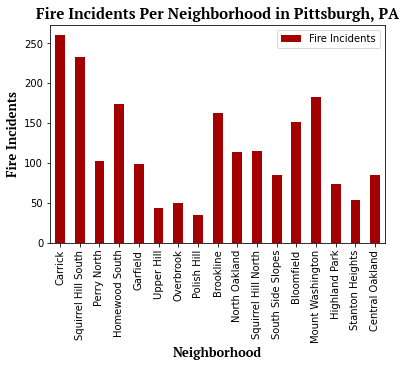

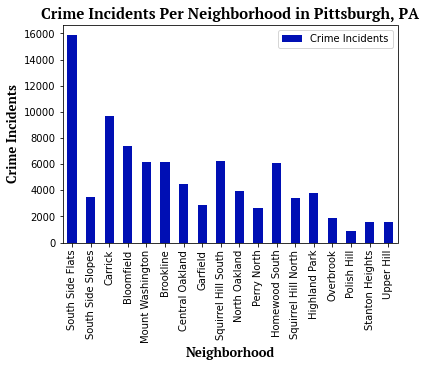

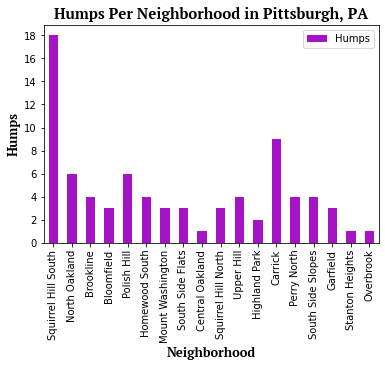

In [15]:
#Now let's get some pretty graphs out
graph.plot.bar(color="#A50000",  x="Neighborhood", y="Fire Incidents")
metaGraphGroup("Fire Incidents")

count_df.plot.bar(color="#000FB4", x="Neighborhood", y="Crime Incidents")
metaGraphGroup("Crime Incidents")

graphHumps.plot.bar(color="#A414C4", x="Neighborhood", y="Humps")
plt.yticks([0,2,4,6,8,10,12,14,16,18,])
metaGraphGroup("Humps")

## Sorted Graphs

Now let's sort our graphs in accordance with their metric. So for our first two graphs, lower means better, so we're going to assort them ascending, but for our last graph, higher means better, and so we sort it descending. Still, we don't see a clear winner, so we have to do some cool math.

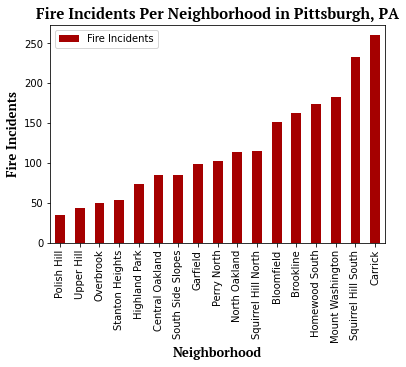

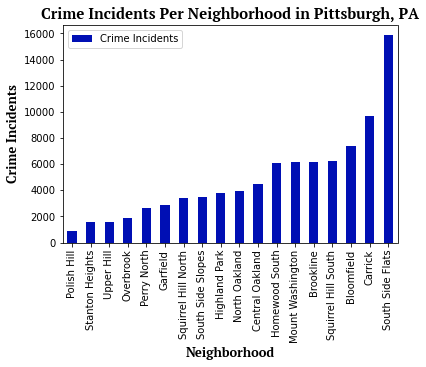

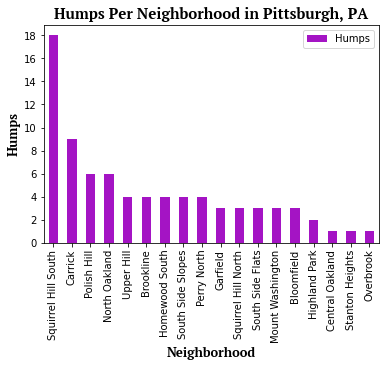

In [16]:
#We do a little sorting
graphSorted = graph.sort_values("Fire Incidents", ascending=True)
count_df_sorted = count_df.sort_values("Crime Incidents", ascending=True)
graphHumpsSorted = graphHumps.sort_values("Humps", ascending=False)

#More pretty graphs
graphSorted.plot.bar(color="#A50000",  x="Neighborhood", y="Fire Incidents")
metaGraphGroup("Fire Incidents")

count_df_sorted.plot.bar(color="#000FB4", x="Neighborhood", y="Crime Incidents")
metaGraphGroup("Crime Incidents")

graphHumpsSorted.plot.bar(color="#A414C4", x="Neighborhood", y="Humps")
plt.yticks([0,2,4,6,8,10,12,14,16,18,])
metaGraphGroup("Humps")

## Putting it All Together

Finally, the time has come for us to combine all of our metrics. We've decided to do this in a way similar to the Olympics. Meaning that we're going to give out points for winning which will be less than the number of points for losing. So first place will get 1 point, second will get 2 etc. Then, we can graph the point totals for the neighborhoods and decide, via who has the least points, which neighborhood is the safest. 

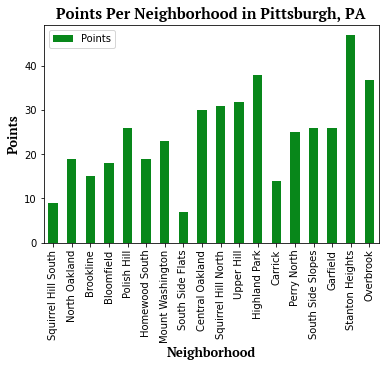

In [17]:
points = [0] * len(hoods)

for i in range(0, len(graphSorted["Neighborhood"])):
    k = hoods.index(graphSorted["Neighborhood"].loc[i])
    points[k] += i
    
for i in range(0, len(count_df_sorted["Neighborhood"])):
    k = hoods.index(count_df_sorted["Neighborhood"].loc[i])
    points[k] += i
    
for i in range(0, len(graphHumpsSorted["Neighborhood"])):
    k = hoods.index(graphHumpsSorted["Neighborhood"].loc[i])
    points[k] += i

pointsDict = {"Neighborhood":hoods, "Points":points}
pointsDF = pd.DataFrame.from_dict(pointsDict)

pointsDF.plot.bar(color="#08871A",  x="Neighborhood", y="Points")
metaGraphGroup("Points")

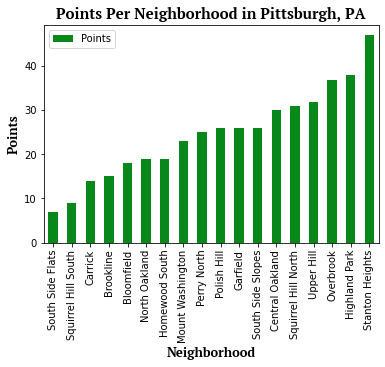

In [18]:
pointsDFSorted = pointsDF.sort_values("Points", ascending=True)

pointsDFSorted.plot.bar(color="#08871A",  x="Neighborhood", y="Points")
metaGraphGroup("Points")

## Conclusion

Once again, after sorting and graphig, we have our clear winners. Through our metrics of fire, crime, and speedhumps, we declare the safest neighborhood in Pittsburgh to be South Side Flats, followed by the runners up Squirrel Hill South and Carrick. Congratulations to all neighborhoods that put in their bid, you tried your best.